In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler, Normalizer, Imputer
import time
from scipy.stats import zscore
from datetime import datetime
from IPython.display import display, HTML

# Import Shudhi Modules

In [2]:
from shudhi import shudhi_describe
from shudhi import shudhi_transform

## Import Datasets: we have a small and a big dataset

In [3]:
df_four = pd.read_json('foursquare_test.json', orient='records')

In [4]:
df_four.shape

(400, 11)

In [17]:
df_complaint = pd.read_csv('Top_5_complaints.csv')

In [18]:
df_complaint.shape

(376062, 36)

## Run Shudhi Describe: Baseline

In [7]:
shudhi_describe(df_four, plot=False)


                                       SUMMARY STATISTICS


,Feature,Feature Type,count,# Unique,# Missing,# Outliers,mean,median,min,max
0,country,String/Object,400,1,0,,,,,
1,id,String/Object,400,400,0,,,,,
2,latitude,Real Value,400,399,0,1,40.75,40.74,40.6605,42.3531
3,locality,String/Object,400,5,0,,,,,
4,longitude,Real Value,400,399,0,1,-73.97,-73.99,-74.0159,-71.0541
5,name,String/Object,400,386,0,,,,,
6,phone,String/Object,400,199,181,,,,,
7,postal_code,Real Value saved as string,400,53,0,,,,,
8,region,String/Object,400,1,0,,,,,
9,street_address,String/Object,400,310,0,,,,,


Note: Categorical columns will not have outliers/mean/median/min/max
--------------------------------------------------------------------------------------------------------------------



                                       SUMMARY STATISTICS


,Feature,Feature Type,count,# Unique,# Missing,# Outliers,mean,median,min,max
0,Unique Key,Integer,376062,376062,0,12294,3.34056e+07,3.37504e+07,1.95111e+07,3.89483e+07
1,Created Date,String/Object,376062,334662,0,,,,,
2,Closed Date,String/Object,376062,273775,2239,,,,,
3,Agency,String/Object,376062,7,0,,,,,
4,Agency Name,String/Object,376062,39,0,,,,,
5,Complaint Type,String/Object,376062,5,0,,,,,
6,Descriptor,String/Object,376062,62,0,,,,,
7,Location Type,String/Object,376062,20,31986,,,,,
8,Incident Zip,Real Value,376062,209,2370,26,10795.9,11203,0,11697
9,Incident Address,String/Object,376062,151287,34479,,,,,


Note: Categorical columns will not have outliers/mean/median/min/max
--------------------------------------------------------------------------------------------------------------------

                                             PLOTS

    UNIVATIATE PLOTS: Continuous Features


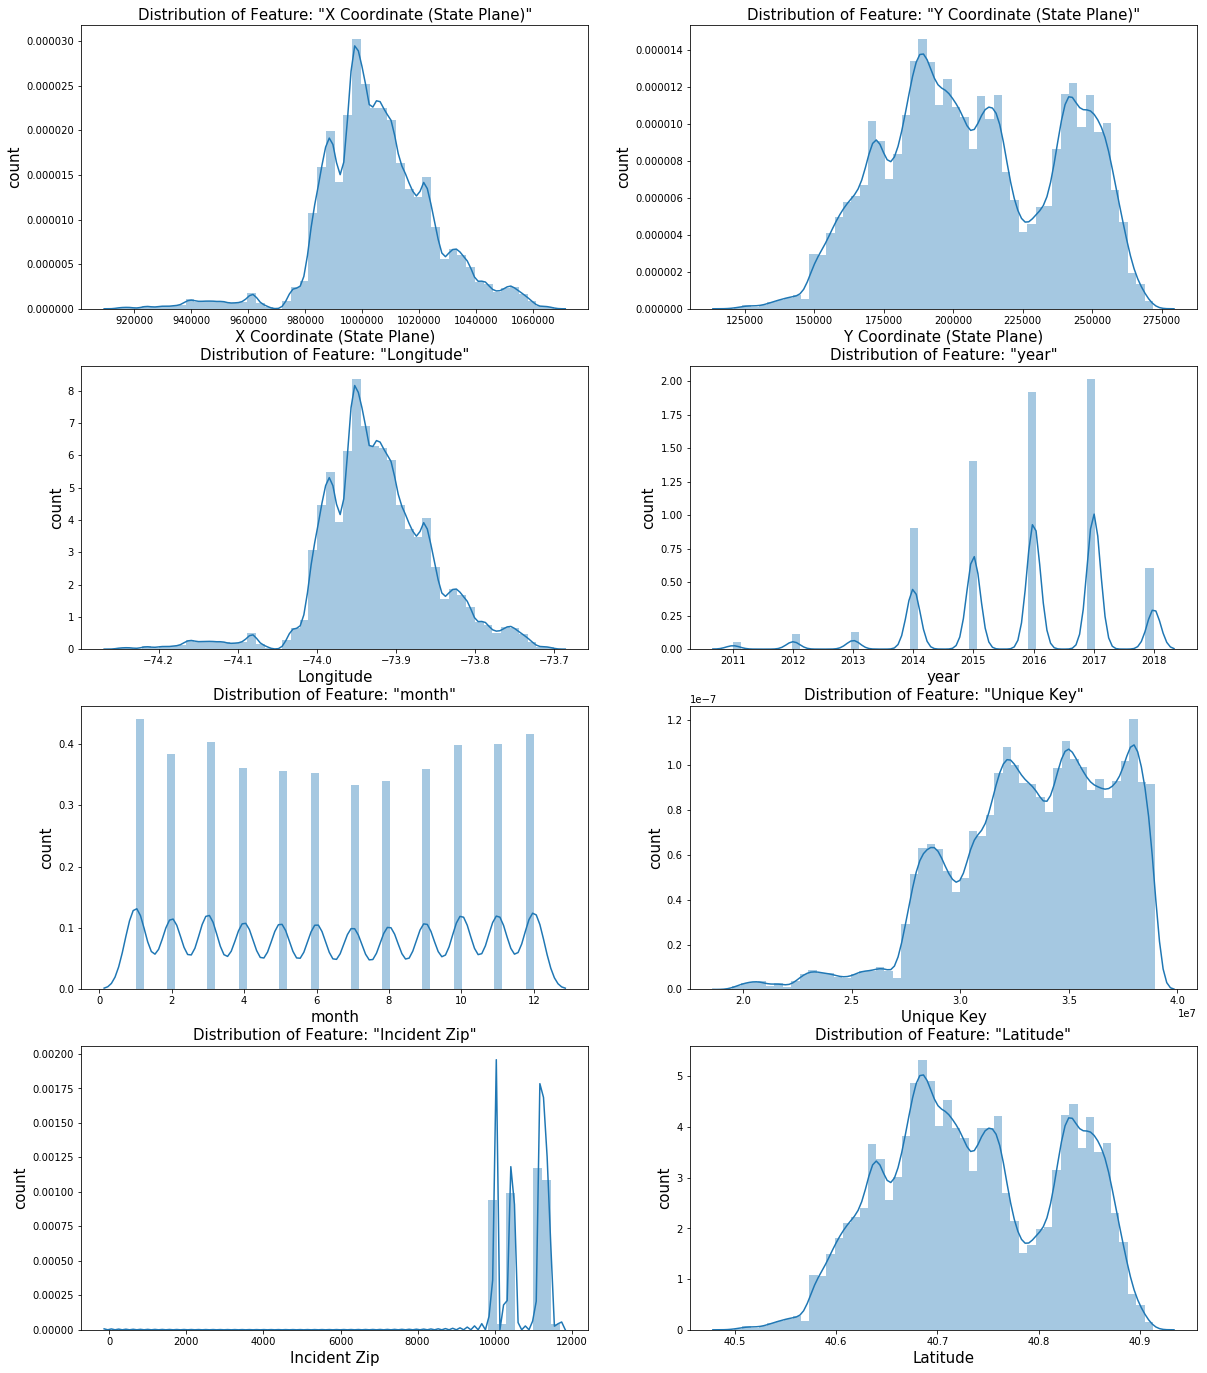

    UNIVATIATE PLOTS: Categorical Features


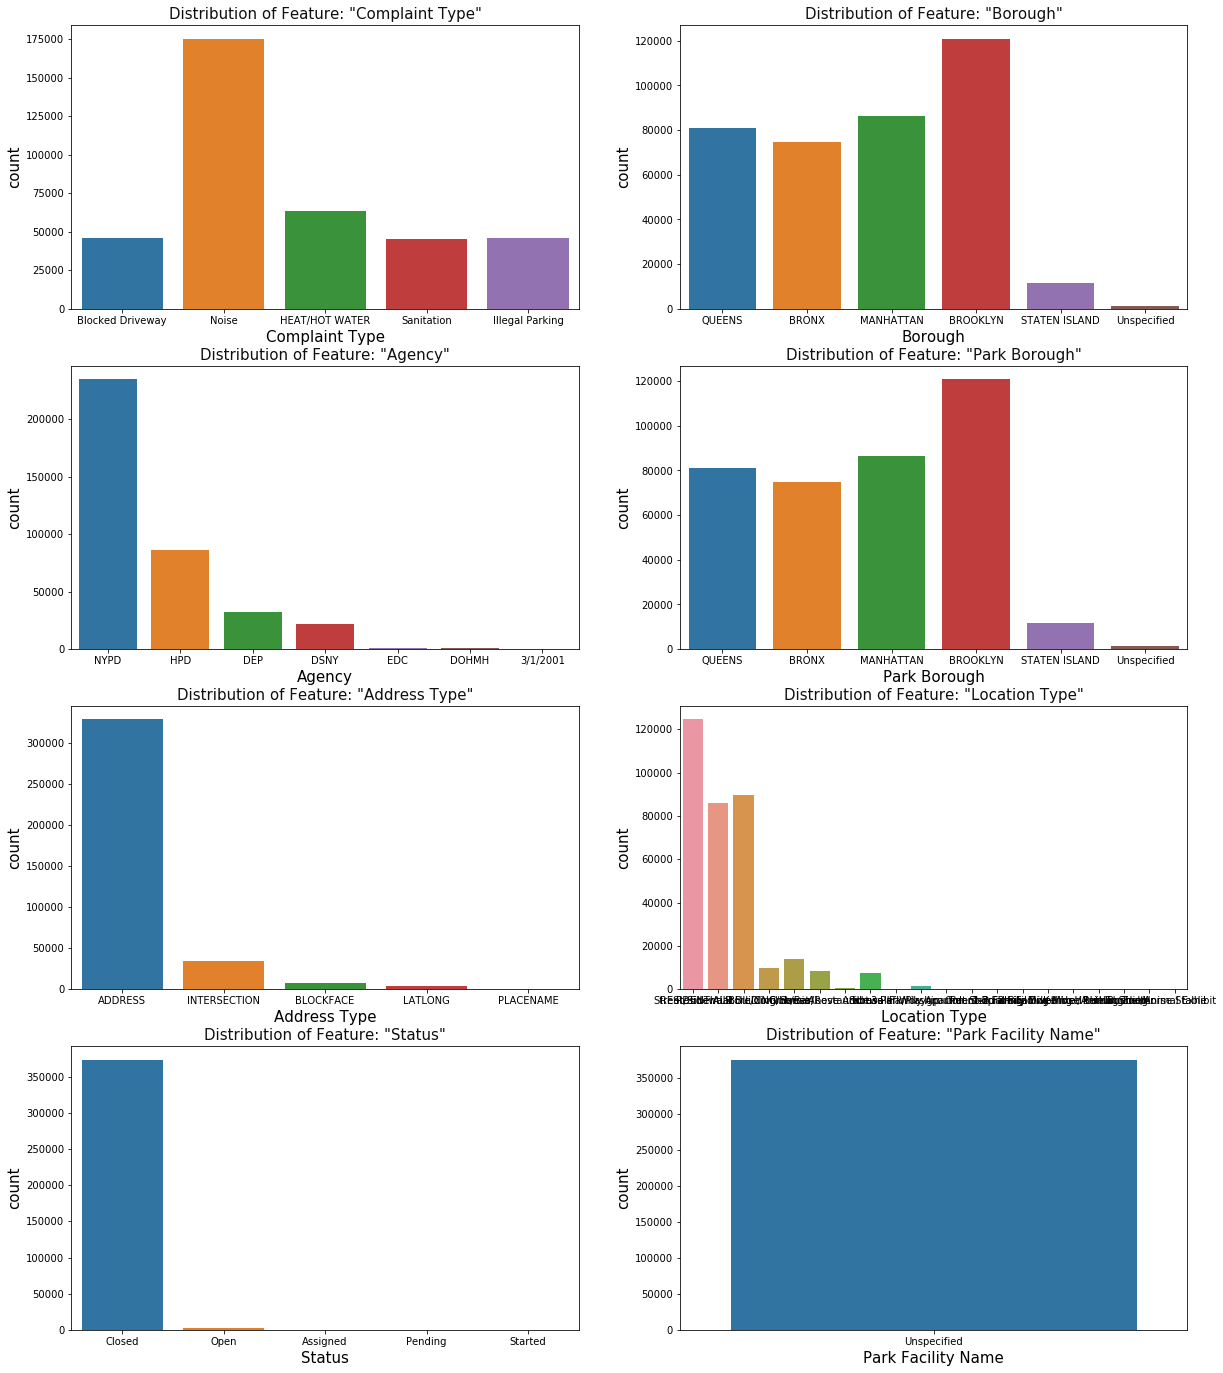

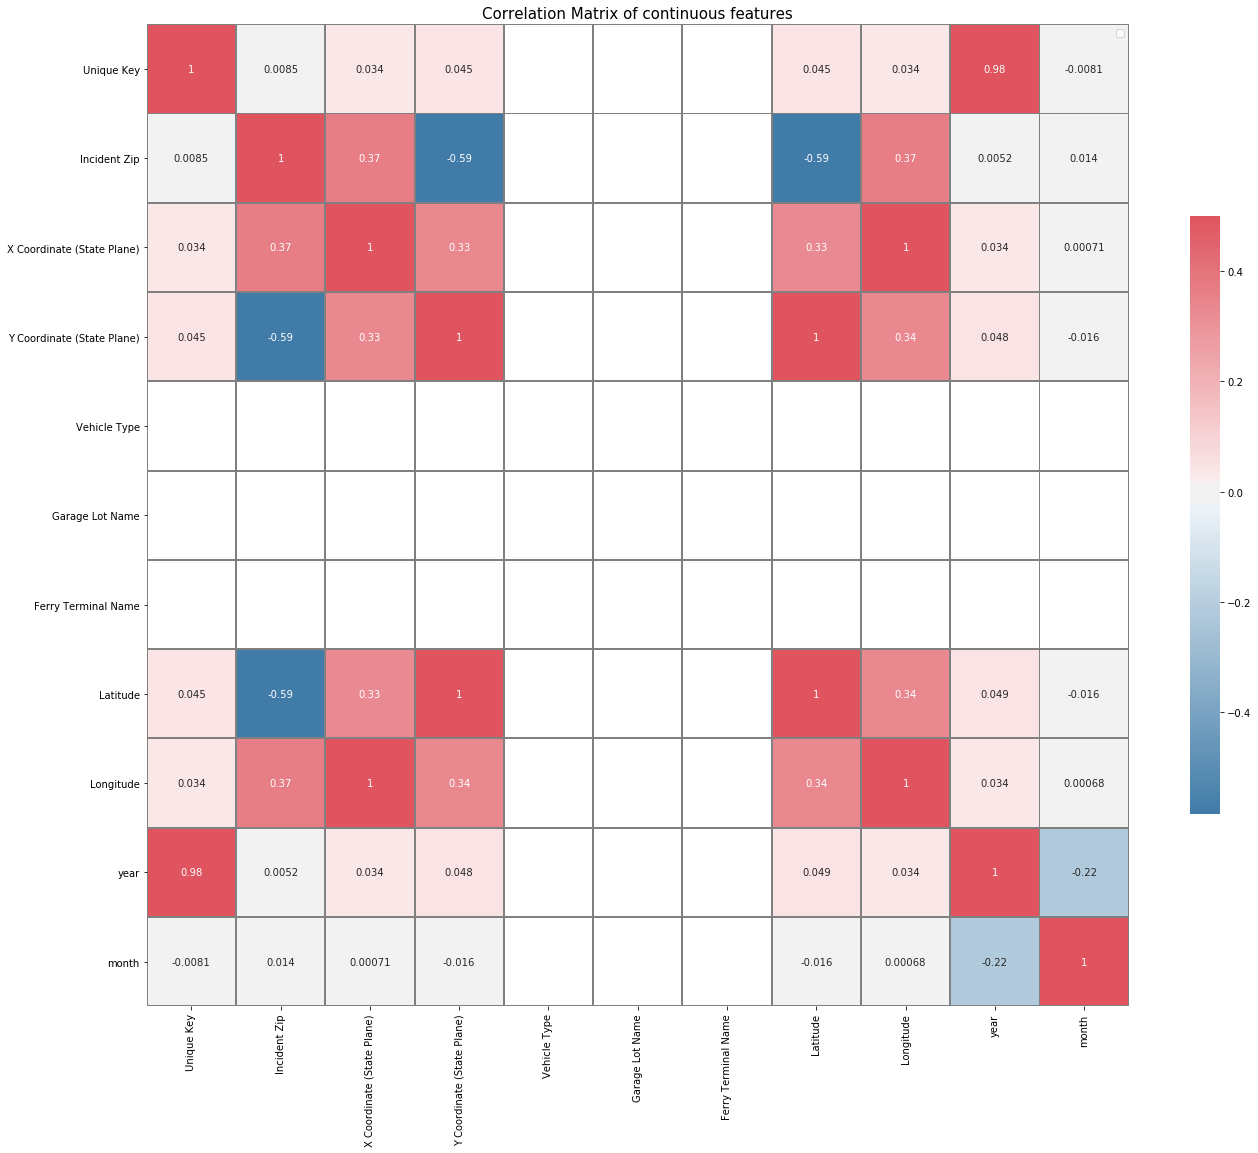

In [8]:
shudhi_describe(df_complaint, plot=True)

# Run Shudhi Transform

#### Function call:
    shudhi_transform(df_train, df_test= None, cols= [None], missing_strategy=None, empty_missing= False, 
                 missing_override=False, scale_strategy= None, outlier_strategy= None, one_hot= False, convert= False)

## Let's do some missing value treatment and scaling

In [19]:
# Fill in missing values with mean and then scale with "max_abs" scaler

df_train_new, df_test= shudhi_transform(df_train=df_complaint, cols=['Latitude', 'Longitude', 'Incident Zip'], 
                           missing_strategy='remove',  scale_strategy='std')

['Latitude', 'Longitude', 'Incident Zip']


In [20]:
shudhi_describe(df_train= df_train_new, plot=False)


                                       SUMMARY STATISTICS


,Feature,Feature Type,count,# Unique,# Missing,# Outliers,mean,median,min,max
0,Unique Key,Integer,373035,373035,0,12002,3.34183e+07,3.37563e+07,1.95111e+07,3.89483e+07
1,Created Date,String/Object,373035,332137,0,,,,,
2,Closed Date,String/Object,373035,272758,1523,,,,,
3,Agency,String/Object,373035,7,0,,,,,
4,Agency Name,String/Object,373035,38,0,,,,,
5,Complaint Type,String/Object,373035,5,0,,,,,
6,Descriptor,String/Object,373035,62,0,,,,,
7,Location Type,String/Object,373035,20,31510,,,,,
8,Incident Zip,Real Value,373035,207,0,24,0,0.74,-19.4247,1.63268
9,Incident Address,String/Object,373035,150248,33554,,,,,


Note: Categorical columns will not have outliers/mean/median/min/max
--------------------------------------------------------------------------------------------------------------------


### Result: About 3000 missing rows removed and three features scaled to mean=0 and std.dev=1

## Let's do some outlier treatment

In [21]:

df_train_new, df_test= shudhi_transform(df_train=df_train_new, cols=['Latitude'], 
                         outlier_strategy='remove' )

In [22]:
shudhi_describe(df_train= df_train_new, plot=False)


                                       SUMMARY STATISTICS


,Feature,Feature Type,count,# Unique,# Missing,# Outliers,mean,median,min,max
0,Unique Key,Integer,369692,369692,0,11819,3.34268e+07,3.3763e+07,1.95111e+07,3.89483e+07
1,Created Date,String/Object,369692,329346,0,,,,,
2,Closed Date,String/Object,369692,270717,1514,,,,,
3,Agency,String/Object,369692,7,0,,,,,
4,Agency Name,String/Object,369692,38,0,,,,,
5,Complaint Type,String/Object,369692,5,0,,,,,
6,Descriptor,String/Object,369692,62,0,,,,,
7,Location Type,String/Object,369692,19,31157,,,,,
8,Incident Zip,Real Value,369692,205,0,24,0.01,0.74,-19.4247,1.63268
9,Incident Address,String/Object,369692,148250,32953,,,,,


Note: Categorical columns will not have outliers/mean/median/min/max
--------------------------------------------------------------------------------------------------------------------


### Result: all rows with outliers remove. Note that shudhi_describe still shows 269 outliers as the distribution has changed now. Old outliers were removed, but, that creates new ones

## Time for some one hot encoding

In [24]:
df_train_new, df_test= shudhi_transform(df_train=df_train_new, cols=['Agency'], one_hot=True )

In [25]:
shudhi_describe(df_train= df_train_new, plot=False)


                                       SUMMARY STATISTICS


,Feature,Feature Type,count,# Unique,# Missing,# Outliers,mean,median,min,max
0,Unique Key,Integer,369692,369692,0,11819,3.34268e+07,3.3763e+07,1.95111e+07,3.89483e+07
1,Created Date,String/Object,369692,329346,0,,,,,
2,Closed Date,String/Object,369692,270717,1514,,,,,
3,Agency Name,String/Object,369692,38,0,,,,,
4,Complaint Type,String/Object,369692,5,0,,,,,
5,Descriptor,String/Object,369692,62,0,,,,,
6,Location Type,String/Object,369692,19,31157,,,,,
7,Incident Zip,Real Value,369692,205,0,24,0.01,0.74,-19.4247,1.63268
8,Incident Address,String/Object,369692,148250,32953,,,,,
9,Street Name,String/Object,369692,7603,32953,,,,,


Note: Categorical columns will not have outliers/mean/median/min/max
--------------------------------------------------------------------------------------------------------------------


### Result: It worked!

### Note: All these can be done in one function call. This was just to demonstrate the concept.